In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Opening original .csv data set for manipulation
df = pd.read_csv("C:/Users/Owner/medical_time_series.csv")

In [3]:
# Data exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Day      731 non-null    int64  
 1   Revenue  731 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 11.6 KB


In [4]:
df.head()

,Day,Revenue
0,1,0.000000
1,2,-0.292356
2,3,-0.327772
3,4,-0.339987
4,5,-0.124888


In [5]:
# Checking for duplicates
df.duplicated().value_counts()

False    731
Name: count, dtype: int64

In [6]:
# Checking for null values
df.isnull().sum()

Day        0
Revenue    0
dtype: int64

In [7]:
# Timestep Formatting

In [8]:
# Date
intial_date = pd.to_datetime('2022-01-01')


In [9]:
# Fix Day column
df['Date'] = pd.to_timedelta(df['Day'] - 1, unit='D') + intial_date
df.drop('Day', axis=1, inplace=True)

In [10]:
# Set index
df.set_index('Date', inplace=True)

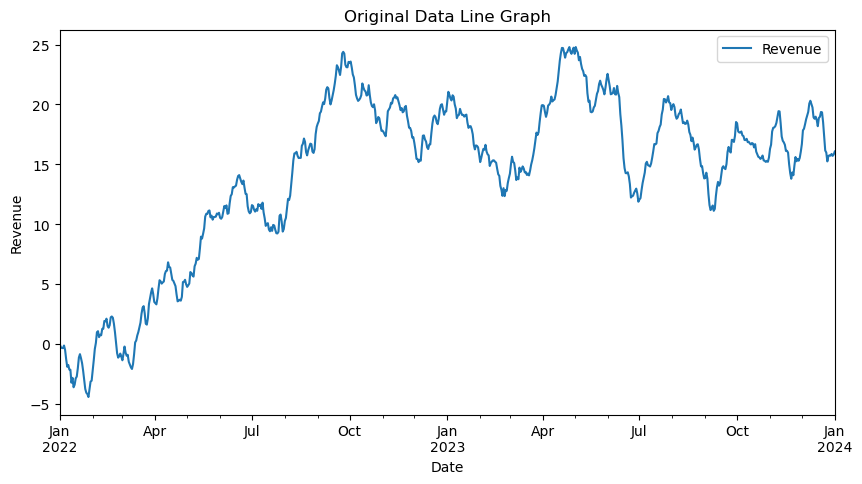

In [11]:
# Line graph
df.plot(figsize=(10,5), ylabel='Revenue')
plt.title('Original Data Line Graph')
plt.legend()


Text(0.5, 1.0, 'Original Data with Trend Line')

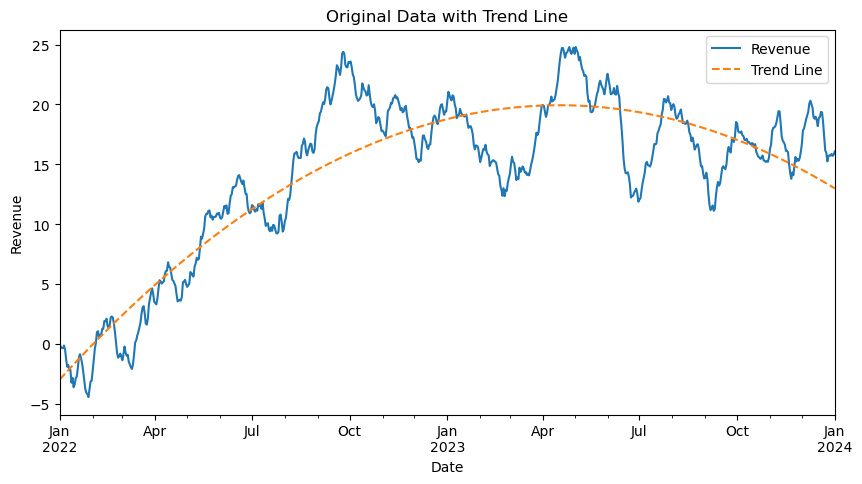

In [12]:
# Graph with trend line (Zach, 2022)
df.plot(figsize=(10,5), ylabel='Revenue')


# Define
trend_x = np.arange(len(df.index))
trend_y = df['Revenue']

# Calculate
trend_z = np.polyfit(trend_x, trend_y, 2)
trend_p = np.poly1d(trend_z)

# Change to dates for graph
trend_x_dates = df.index.date

# Plot trendline
plt.plot(trend_x_dates, trend_p(trend_x), "--", label='Trend Line')
plt.legend()
plt.title('Original Data with Trend Line')

In [13]:
# Checking stationarity

In [14]:
# Graph revenue data

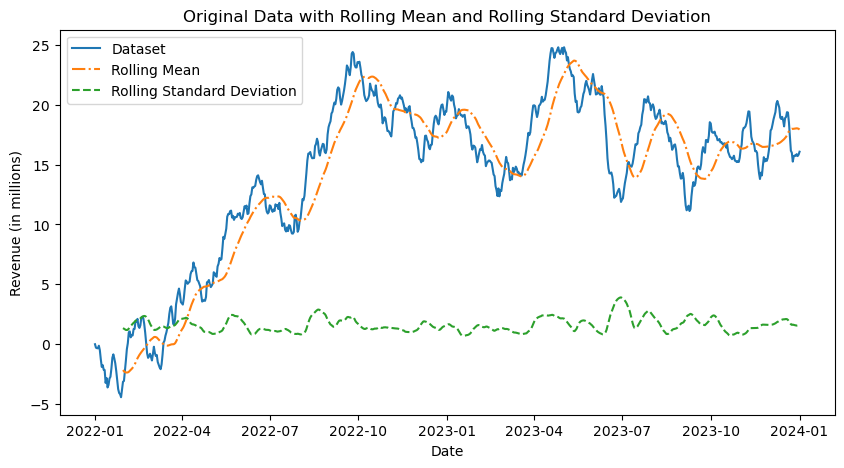

In [15]:
monthly_rolling_mean = df.rolling(window=30).mean()
monthly_rolling_std = df.rolling(window=30).std()

plt.figure(figsize=[10,5])
plt.plot(df, label = 'Dataset')
plt.plot(monthly_rolling_mean, ls='-.', label='Rolling Mean')
plt.plot(monthly_rolling_std, ls='--', label='Rolling Standard Deviation')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Revenue (in millions)')
plt.title('Original Data with Rolling Mean and Rolling Standard Deviation')
plt.show()

In [16]:
# Run ADF (Dickey-Fuller) and show ADF
dickeyfuller = adfuller(df)
print('ADF: ', dickeyfuller[0].round(2))
print('p-value: ', dickeyfuller[1].round(2))

ADF:  -2.22
p-value:  0.2


In [17]:
# Stationarizing data

In [18]:
# Difference dataset
df_diff = df.diff().dropna()

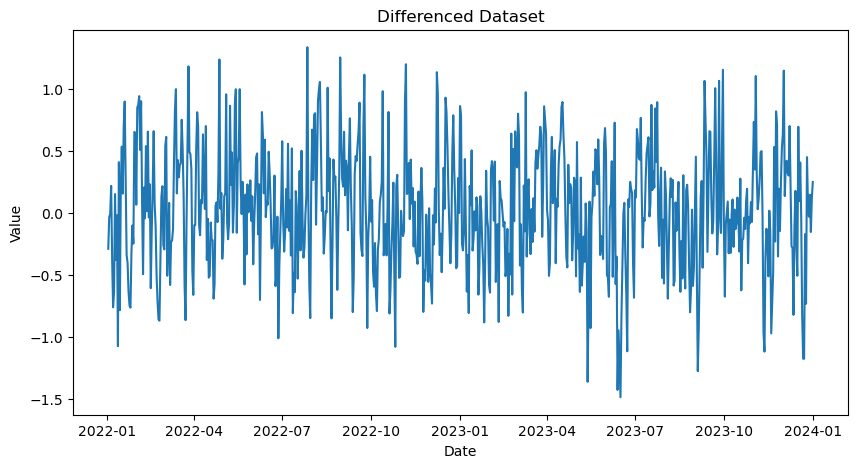

In [19]:
# Graph
plt.figure(figsize=[10,5])
plt.title('Differenced Dataset')
plt.xlabel('Date')
plt.ylabel('Value')
plt.plot(df_diff)

plt.show()

In [20]:
# Rerun stationarity tests on differenced data
dickeyfuller_diff = adfuller(df_diff)
print('ADF: ', dickeyfuller_diff[0].round(2))
print('p-value: ', dickeyfuller_diff[1].round(2))

ADF:  -17.37
p-value:  0.0


In [21]:
# Split data
train, test = train_test_split(df, test_size=0.2, shuffle=False, random_state=13)

In [22]:
train

,Revenue
Date,
2022-01-01,0.000000
2022-01-02,-0.292356
2022-01-03,-0.327772
2022-01-04,-0.339987
2022-01-05,-0.124888
...,...
2023-08-03,19.782635
2023-08-04,19.088265
2023-08-05,18.805501


In [23]:
test

,Revenue
Date,
2023-08-08,19.312734
2023-08-09,19.576725
2023-08-10,18.988035
2023-08-11,18.437608
2023-08-12,18.519085
...,...
2023-12-28,15.722056
2023-12-29,15.865822
2023-12-30,15.708988


In [24]:
# Saving new files
train.to_csv('d213task1train.csv')
test.to_csv('d213task1test.csv')

Text(0, 0.5, 'Value')

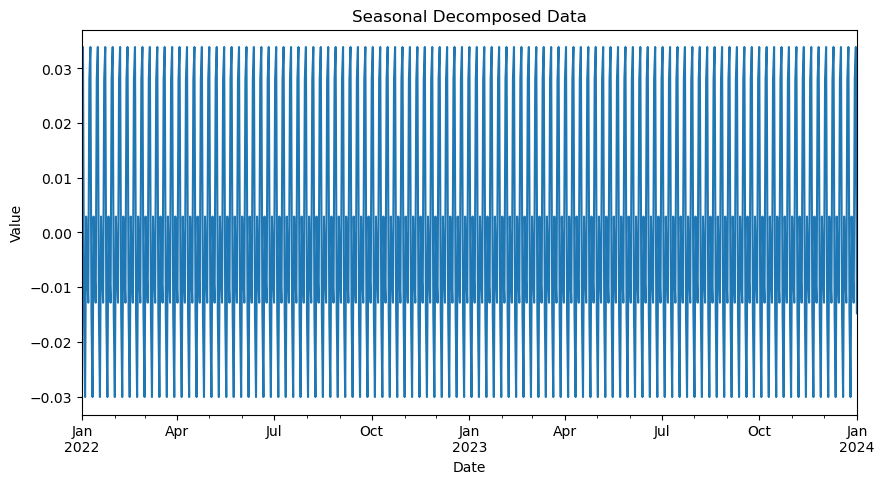

In [25]:
# Decomposing Data and seasonal graph
decomposed_data = seasonal_decompose(df, model='additive')
plt.figure(figsize=[10,5])
decomposed_data.seasonal.plot()
plt.title('Seasonal Decomposed Data')
plt.ylabel('Value')

In [26]:
# Create graphs for decomposed data

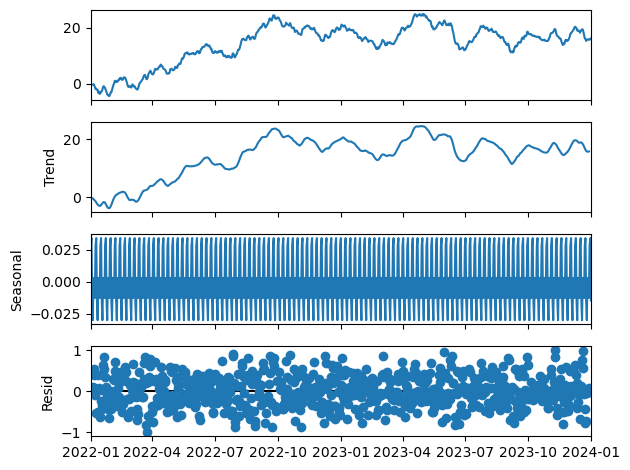

In [27]:
decomposed_data.plot()
plt.show()

In [28]:
# D1f residuals solo

<Axes: title={'center': 'Residuals'}, xlabel='Date', ylabel='Value'>

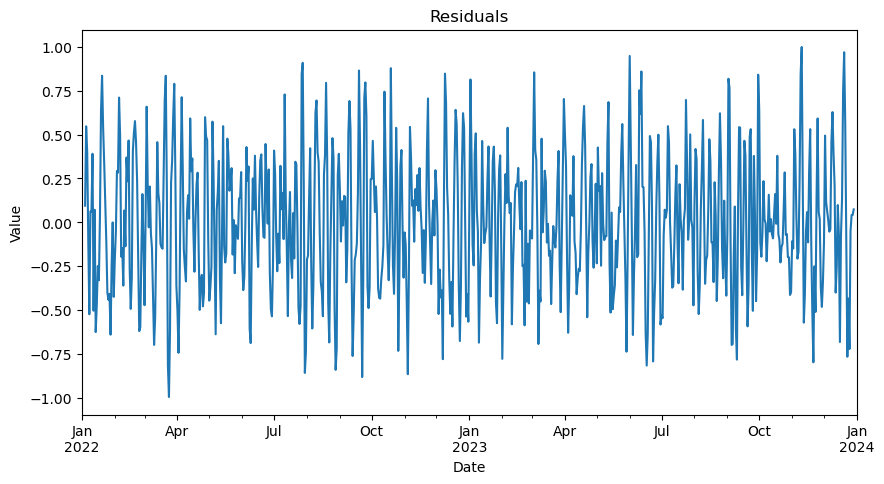

In [29]:
plt.figure(figsize=[10,5])
plt.ylabel('Value')
plt.title('Residuals')
decomposed_data.resid.plot()

In [30]:
# Run ACF and PACF on differenced data

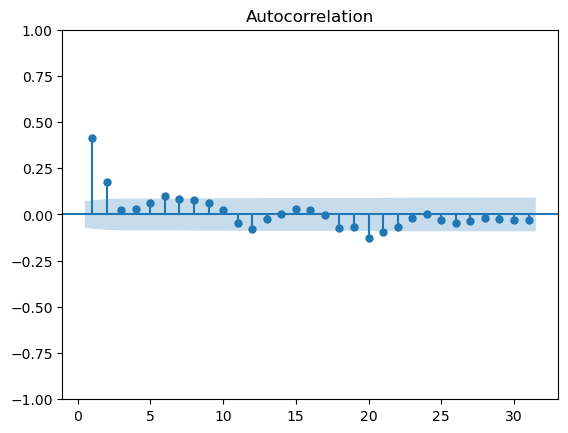

In [31]:
# ACF (q value)
plot_acf(df_diff, lags=31, zero=False);

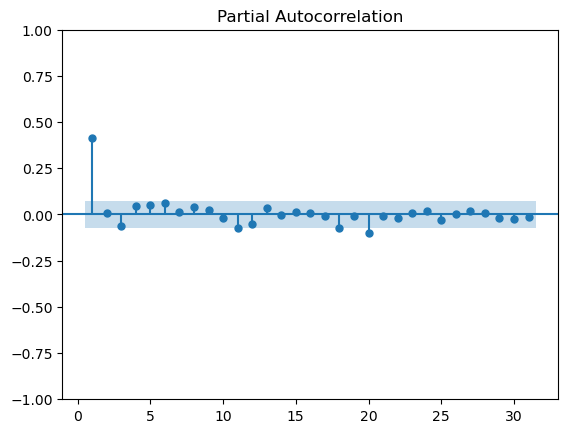

In [32]:
# PACF (p value)
plot_pacf(df_diff, lags=31, zero=False);

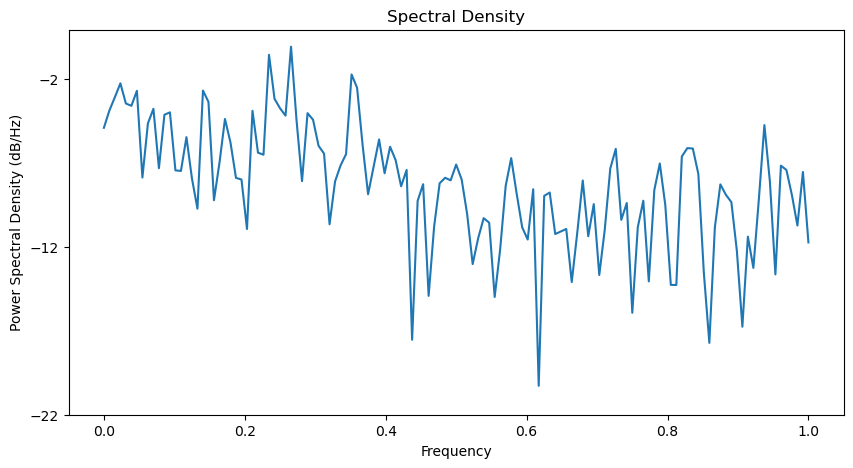

In [33]:
# Spectral Density with differenced data
plt.figure(figsize=[10,5])
plt.psd(x=df_diff.Revenue)
plt.title('Spectral Density')
plt.grid(False)
plt.show()

In [34]:
# Auto ARIMA on original dataset
a_arima = auto_arima(df, trace=True, suppress_warnings=True, stepwise=True)
a_arima.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=883.277, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1015.972, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=881.359, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=906.199, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1015.481, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=883.300, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=883.314, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=883.348, Time=0.41 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=879.982, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=881.911, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=881.927, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=905.166, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=881.947, Time=0.20 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.864 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  731
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -437.991
Date:                Thu, 11 Jul 2024   AIC                            879.982
Time:                        23:44:14   BIC                            889.168
Sample:                    01-01-2022   HQIC                           883.526
                         - 01-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4142      0.034     12.258      0.000       0.348       0.480
sigma2         0.1943      0.011     17.842      0.000       0.173       0.216
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.92
Prob(Q):                              0.90   Prob(JB):                         0.38
Heteroskedasticity (H):               1.00   Skew:                            -0.02
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
# ARIMA Model with training data

In [36]:
arima_model = ARIMA(train, order=(1,1,0), freq='D')
arima_results = arima_model.fit()
arima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  584
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -350.812
Date:                Thu, 11 Jul 2024   AIC                            705.625
Time:                        23:44:14   BIC                            714.361
Sample:                    01-01-2022   HQIC                           709.030
                         - 08-07-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4106      0.038     10.837      0.000       0.336       0.485
sigma2         0.1950      0.012     15.888      0.000       0.171       0.219
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 1.86
Prob(Q):                              0.70   Prob(JB):                         0.39
Heteroskedasticity (H):               1.04   Skew:                            -0.05
Prob(H) (two-sided):                  0.78   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

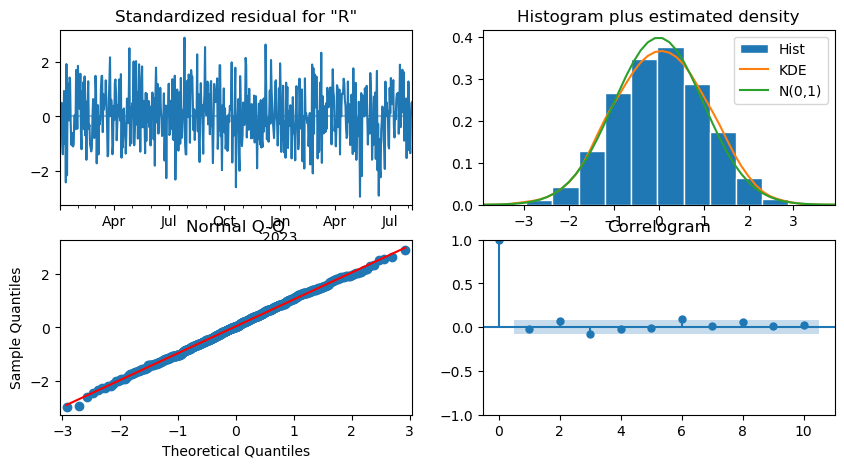

In [37]:
# Graphs from ARIMA results
arima_results.plot_diagnostics(figsize=(10,5));

In [38]:
# MAE
mae = arima_results.mae
print('MAE: ', mae.round(3))

MAE:  0.357


In [39]:
# Test dataset ARIMA
arima_model_test = ARIMA(test, order=(1,1,0), freq='D')
arima_results_test = arima_model_test.fit()
arima_results_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  147
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -87.186
Date:                Thu, 11 Jul 2024   AIC                            178.373
Time:                        23:44:14   BIC                            184.340
Sample:                    08-08-2023   HQIC                           180.797
                         - 01-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4256      0.076      5.592      0.000       0.276       0.575
sigma2         0.1930      0.024      7.940      0.000       0.145       0.241
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):                 0.50
Prob(Q):                              0.63   Prob(JB):                         0.78
Heteroskedasticity (H):               1.01   Skew:                             0.10
Prob(H) (two-sided):                  0.98   Kurtosis:                         2.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
# MAE test dataset
mae = arima_results_test.mae
print('MAE: ', mae.round(3))

MAE:  0.483


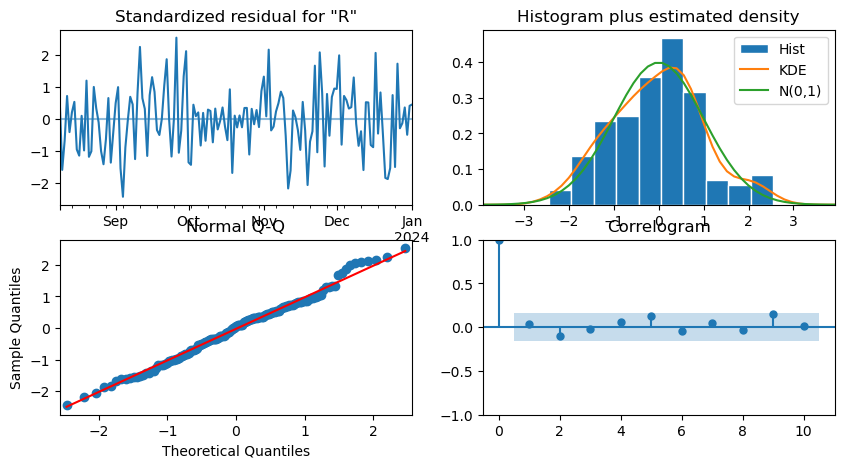

In [41]:
# Graphs from ARIMA results
arima_results_test.plot_diagnostics(figsize=(10,5));

In [42]:
# Forecasting (Course materials, n.d.)

In [43]:
forecast_test = arima_results.get_forecast(steps=len(test))
mean_forecast = forecast_test.predicted_mean

confidence_intervals = forecast_test.conf_int()
lower_limits = confidence_intervals.loc[:, 'lower Revenue']
upper_limits = confidence_intervals.loc[:, 'upper Revenue']

confidence_intervals_2 = forecast_test.conf_int(alpha=.5)
lower_limits_2 = confidence_intervals_2.iloc[:,0]
upper_limits_2 = confidence_intervals_2.iloc[:,1]

In [44]:
# Plotting forecast versus test data based on training data

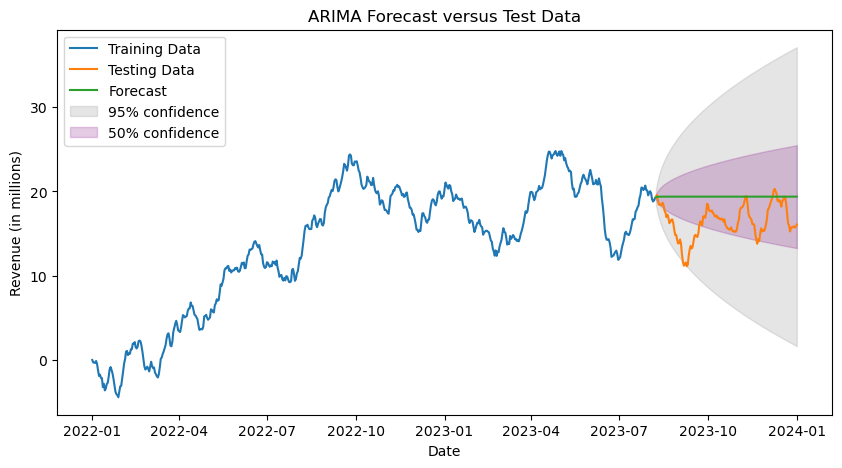

In [45]:
plt.figure(figsize=(10,5))
plt.plot(train['Revenue'], label='Training Data')
plt.plot(test['Revenue'], label='Testing Data')
plt.plot(mean_forecast, label='Forecast')
plt.fill_between(confidence_intervals.index, lower_limits, upper_limits, color='gray', alpha=0.2, label='95% confidence')
plt.fill_between(confidence_intervals_2.index, lower_limits_2, upper_limits_2, color='purple', alpha=0.2, label='50% confidence')
plt.legend(loc='upper left')
plt.title('ARIMA Forecast versus Test Data')
plt.xlabel('Date')
plt.ylabel('Revenue (in millions)')
plt.show()



In [46]:
# Original dataset ARIMA
arima_model_full = ARIMA(df, order=(1,1,0), freq='D')
arima_results_full = arima_model_full.fit()
arima_results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  731
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -437.991
Date:                Thu, 11 Jul 2024   AIC                            879.982
Time:                        23:44:15   BIC                            889.168
Sample:                    01-01-2022   HQIC                           883.526
                         - 01-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4142      0.034     12.258      0.000       0.348       0.480
sigma2         0.1943      0.011     17.842      0.000       0.173       0.216
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.92
Prob(Q):                              0.90   Prob(JB):                         0.38
Heteroskedasticity (H):               1.00   Skew:                            -0.02
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
# MAE for original data ARIMA
mae = arima_results_full.mae
print('MAE: ', mae.round(3))

MAE:  0.356


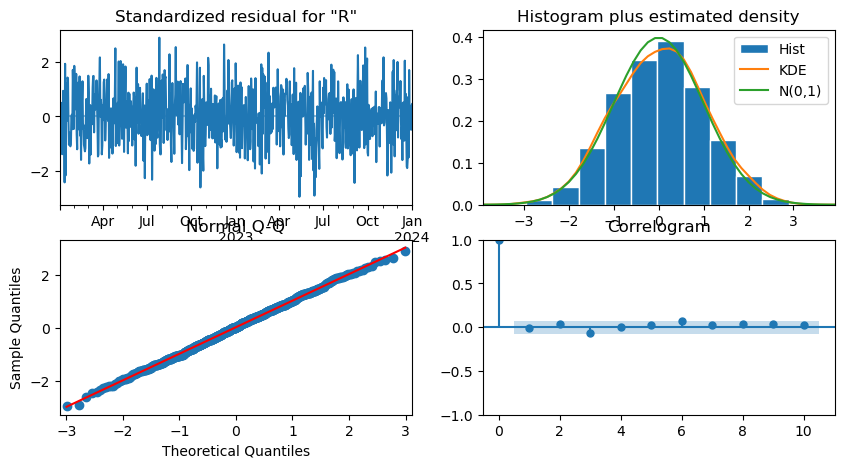

In [48]:
# Graphs from ARIMA results
arima_results_full.plot_diagnostics(figsize=(10,5));

In [49]:
# Prediction to future dates 6 months
index_future_dates = pd.date_range(start='2024-01-02', end='2024-06-30')
pred = arima_results.forecast(steps=181)
pred.index = index_future_dates
pred

2024-01-02    19.299360
2024-01-03    19.345870
2024-01-04    19.364967
2024-01-05    19.372809
2024-01-06    19.376029
                ...    
2024-06-26    19.378272
2024-06-27    19.378272
2024-06-28    19.378272
2024-06-29    19.378272
2024-06-30    19.378272
Freq: D, Name: predicted_mean, Length: 181, dtype: float64

In [50]:
prediction = arima_results_full.get_prediction(start='2024-01-01', end='2024-06-30')

# Prediction mean
mean_prediction = prediction.predicted_mean

# Confidence intervals
confidence_intervals_prediction_2 = prediction.conf_int(alpha=.5)
lower_limits_prediction_2 = confidence_intervals_prediction_2.iloc[:,0]
upper_limits_prediction_2 = confidence_intervals_prediction_2.iloc[:,1]

confidence_intervals_prediction_3 = prediction.conf_int(alpha=.05)
lower_limits_prediction_3 = confidence_intervals_prediction_3.iloc[:,0]
upper_limits_prediction_3 = confidence_intervals_prediction_3.iloc[:,1]

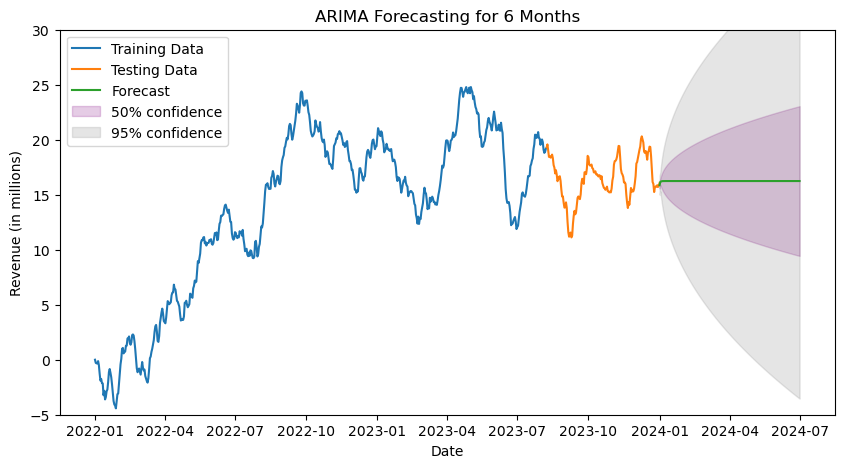

In [51]:
# Displaying test/training/forecast/intervals
plt.figure(figsize=(10,5))
plt.plot(train['Revenue'], label='Training Data')
plt.plot(test['Revenue'], label='Testing Data')
plt.plot(mean_prediction, label='Forecast')
plt.fill_between(confidence_intervals_prediction_2.index, lower_limits_prediction_2, upper_limits_prediction_2, color='purple', alpha=0.2, label='50% confidence')
plt.fill_between(confidence_intervals_prediction_3.index, lower_limits_prediction_3, upper_limits_prediction_3, color='gray', alpha=0.2, label='95% confidence')
plt.ylim(-5, 30)
plt.legend(loc='upper left')
plt.title('ARIMA Forecasting for 6 Months')
plt.xlabel('Date')
plt.ylabel('Revenue (in millions)')
plt.show()



In [52]:
prediction_values = pd.DataFrame(arima_results_full.predict(start='2022-01-01', end='2024-06-30'))
prediction_values.columns = ['Revenue']
prediction_values

,Revenue
2022-01-01,0.000000
2022-01-02,0.000000
2022-01-03,-0.413453
2022-01-04,-0.342442
2022-01-05,-0.345047
...,...
2024-06-26,16.243774
2024-06-27,16.243774
2024-06-28,16.243774
2024-06-29,16.243774
